In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from config import akey

In [5]:
file2 = 'api-data/yearly_summary/ticker_pct_chg_2020.csv'
ticker2020 = pd.read_csv(file2)
ticker2020.head()

,Ticker,pct change,Industry,Sector,Full Time Emp,Year
0,TRST,-21.068702,Financial Services,Banks-Regional,771.0,2020
1,LNTH,-22.791024,Healthcare,Diagnostics & Research,508.0,2020
2,EPRT,-30.174446,Real Estate,REIT-Diversified,27.0,2020
3,MDC,14.384397,Consumer Cyclical,Residential Construction,1656.0,2020
4,VRA,-22.978177,Consumer Cyclical,Footwear & Accessories,2700.0,2020


In [6]:
ticker2020['Bins'] = pd.qcut(ticker2020['Full Time Emp'],6, labels=['xsmall','small','medium','large','xlarge','giant'])
ticker2020.dropna(how='any',inplace=True)
ticker2020

,Ticker,pct change,Industry,Sector,Full Time Emp,Year,Bins
0,TRST,-21.068702,Financial Services,Banks-Regional,771.0,2020,small
1,LNTH,-22.791024,Healthcare,Diagnostics & Research,508.0,2020,small
2,EPRT,-30.174446,Real Estate,REIT-Diversified,27.0,2020,xsmall
3,MDC,14.384397,Consumer Cyclical,Residential Construction,1656.0,2020,medium
4,VRA,-22.978177,Consumer Cyclical,Footwear & Accessories,2700.0,2020,large
...,...,...,...,...,...,...,...
594,SPPI,48.577236,Healthcare,Biotechnology,146.0,2020,xsmall
595,TRHC,-45.211303,Healthcare,Health Information Services,1286.0,2020,medium
596,FSP,-53.535354,Real Estate,REIT-Office,37.0,2020,xsmall
597,HWKN,21.288621,Basic Materials,Specialty Chemicals,656.0,2020,small


In [12]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}%".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


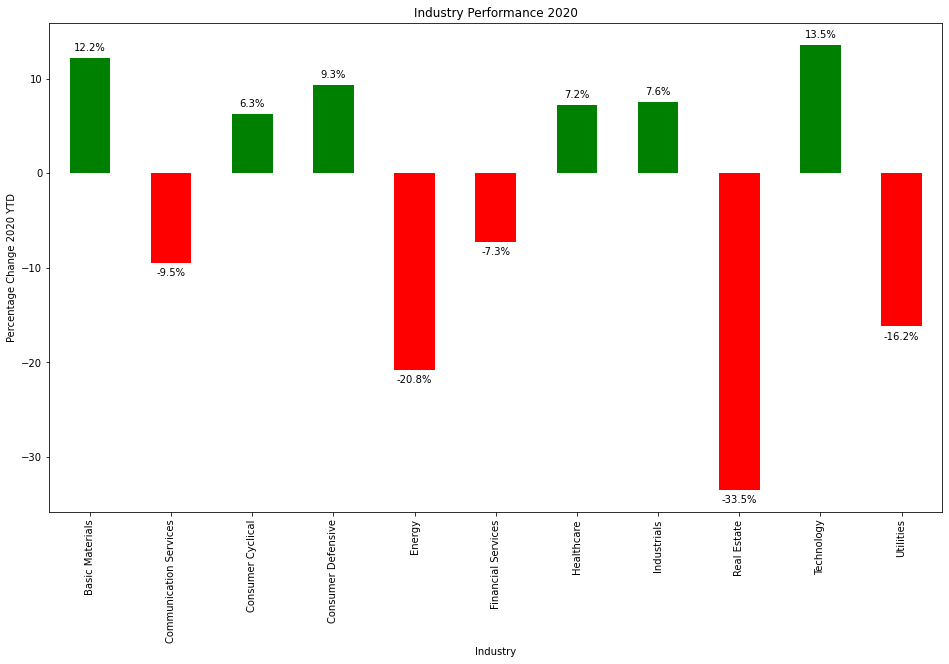

In [15]:
indchg = ticker2020.groupby('Industry')['pct change'].mean()
industry = indchg.to_frame(name='Pct Chg')
industry.reset_index(inplace=True)
x_labels = industry['Industry'].to_list()
y = industry['Pct Chg']
plt.figure(figsize=(16,9))
ax = y.plot(kind='bar', color=(y > 0).map({True: 'g', False:'r'}))
ax.set_title('Industry Performance 2020')
ax.set_xlabel('Industry')
ax.set_ylabel('Percentage Change 2020 YTD')
ax.set_xticklabels(x_labels)
add_value_labels(ax)
plt.savefig('images/industry_performance_w_labels.png')



In [159]:
file3 = 'api-data/yearly_summary/prices_for_2020.csv'
stocks = pd.read_csv(file3)
stocks.head()


,Date,Close,Ticker,Industry,Sector,FullTimeEmployees
0,2020-01-31,7.93,TRST,Financial Services,Banks-Regional,771
1,2020-01-31,17.51,LNTH,Healthcare,Diagnostics & Research,508
2,2020-01-31,27.61,EPRT,Real Estate,REIT-Diversified,27
3,2020-01-31,42.14,MDC,Consumer Cyclical,Residential Construction,1656
4,2020-01-31,9.58,VRA,Consumer Cyclical,Footwear & Accessories,2700


In [160]:
sectors = stocks.groupby(['Industry','Date'])['Close'].sum().to_frame(name="close")
sectors.reset_index(inplace=True)
sectors['Date'] = pd.to_datetime(sectors['Date'], format='%Y-%m-%d')
basic = sectors[(sectors['Industry'] == 'Basic Materials')]
defense = sectors[sectors['Industry'] == 'Consumer Defensive'] 
tech = sectors[(sectors['Industry'] == 'Technology')]

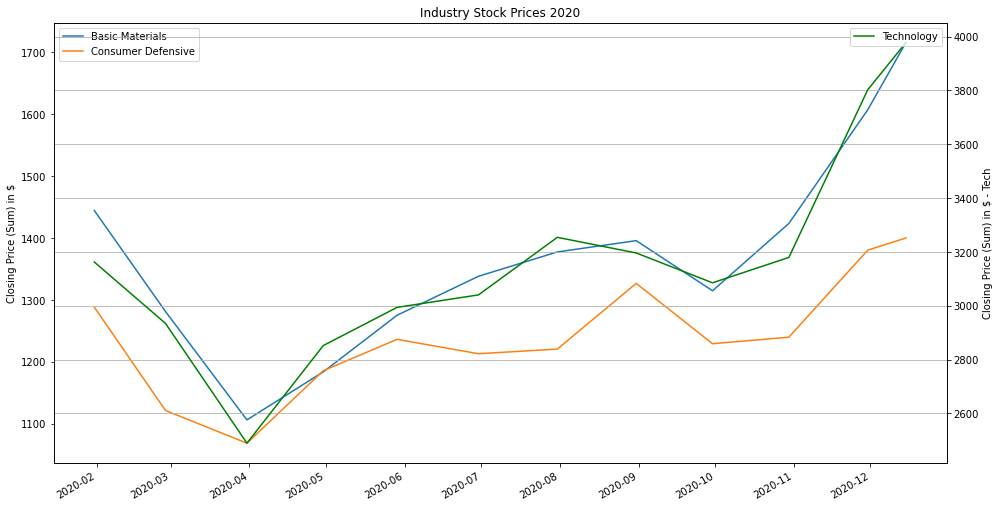

In [197]:
x = tech['Date']
fig, ax1 = plt.subplots(figsize=(16,9))
ax1.plot(x,basic['close'],label='Basic Materials')
ax1.plot(x,defense['close'], label='Consumer Defensive')
ax2 = ax1.twinx()
ax2.plot(x,tech['close'], label='Technology', color='green')
ax1.set_title('Industry Stock Prices 2020')
ax1.set_ylabel('Closing Price (Sum) in $')
ax2.set_ylabel('Closing Price (Sum) in $ - Tech')
fig.autofmt_xdate()
leg = ax1.legend()
leg2 = ax2.legend(loc='upper right')
plt.grid()
fig.savefig('images/selected_industries.png')

In [188]:
overall = sectors.groupby('Date').close.sum().to_frame(name='Closing Price')
overall.reset_index(inplace=True)
overall

,Date,Closing Price
0,2020-01-31,22293.6150
1,2020-02-28,20091.3550
2,2020-03-31,15774.2144
3,2020-04-30,17633.1160
4,2020-05-29,18568.3071
5,2020-06-30,19148.5000
6,2020-07-31,19909.2300
7,2020-08-31,20658.9600
8,2020-09-30,19811.5803
9,2020-10-30,20288.8400


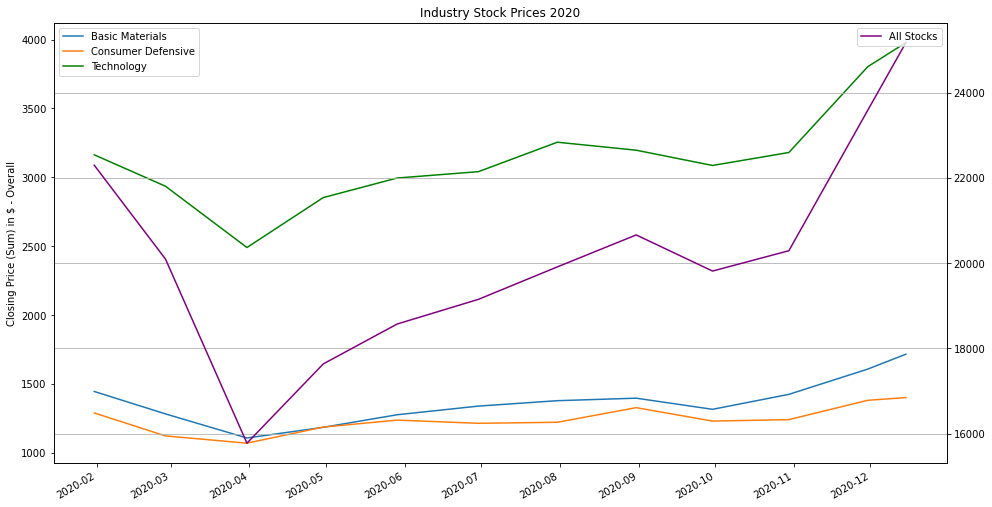

In [198]:
x = tech['Date']
fig, ax1 = plt.subplots(figsize=(16,9))
ax1.plot(x,basic['close'],label='Basic Materials')
ax1.plot(x,defense['close'], label='Consumer Defensive')
ax2 = ax1.twinx()
ax1.plot(x,tech['close'], label='Technology', color='green')
ax1.set_title('Industry Stock Prices 2020')
ax1.set_ylabel('Closing Price (Sum) in $')
ax1.set_ylabel('Closing Price (Sum) in $ - Overall')
plt.grid()
ax2.plot(x,overall['Closing Price'], label='All Stocks', color='purple')
fig.autofmt_xdate()
leg = ax1.legend()
leg2 = ax2.legend(loc='upper right')

fig.savefig('images/selected_vs_all.png')